# Módulo 10 atividade 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/maria-n-ramos/cientistadedadosEBAC/main/Descritiva%20II/Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [3]:
df1=df[['tipo_renda','renda','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']]
df1.corr()

<ipython-input-3-e6de7c97f829>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
renda,1.000000,0.009567,0.042570,0.394235,0.020977
qtd_filhos,0.009567,1.000000,-0.364303,-0.074250,0.896488
idade,0.042570,-0.364303,1.000000,0.323934,-0.338805
tempo_emprego,0.394235,-0.074250,0.323934,1.000000,-0.065748
qt_pessoas_residencia,0.020977,0.896488,-0.338805,-0.065748,1.000000


<ipython-input-4-302fb0ecd448>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df1.corr(),figsize=(10,10),center=0,annot=True,cmap=renda_cmap)


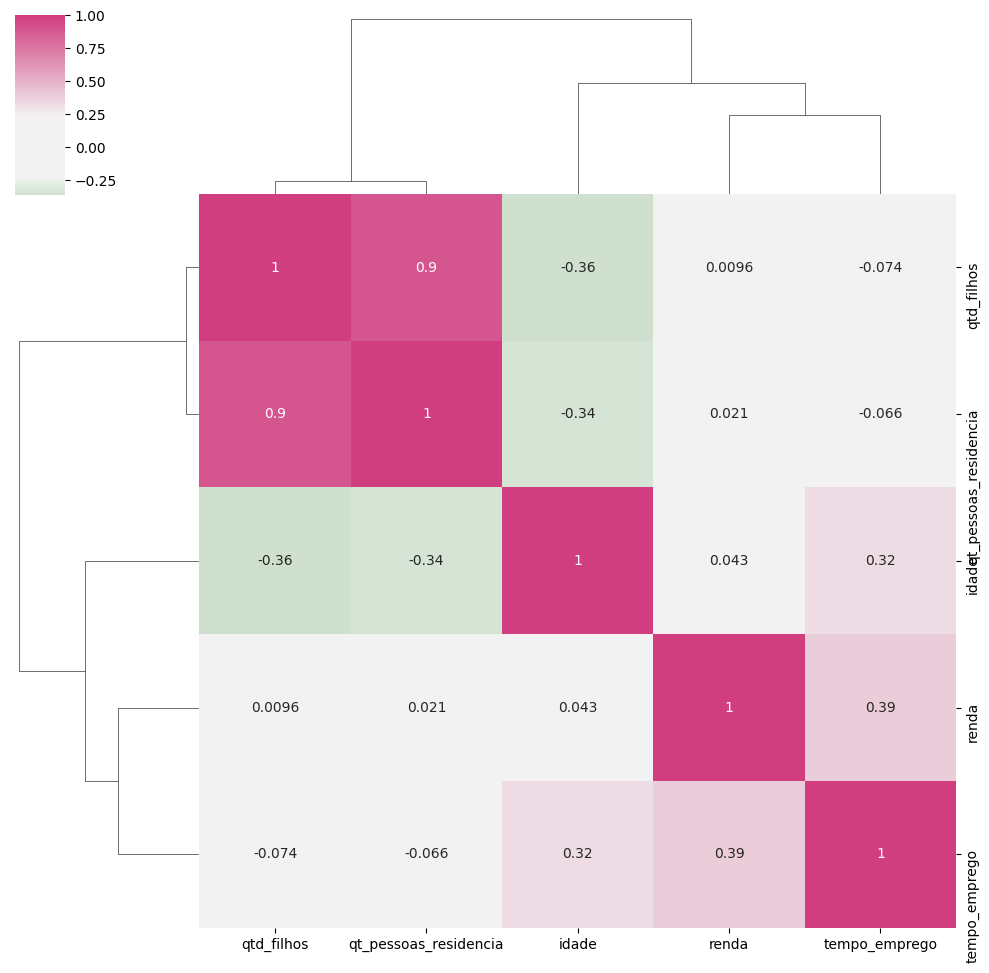

In [4]:
renda_cmap = sns.diverging_palette(h_neg=125,h_pos=350,as_cmap=True,sep=60,center='light')
sns.clustermap(df1.corr(),figsize=(10,10),center=0,annot=True,cmap=renda_cmap)

,tempo_emprego,idade
tempo_emprego,1.000000,0.323934
idade,0.323934,1.000000


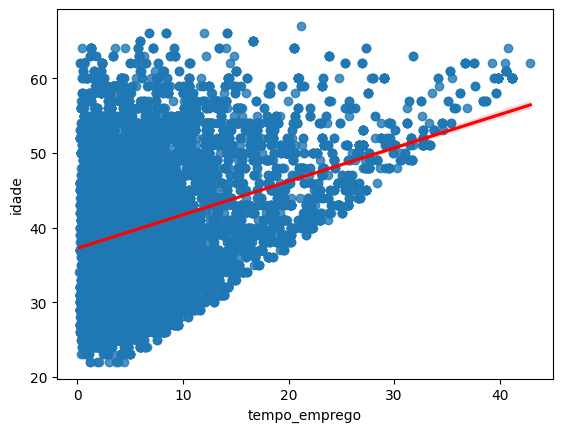

In [5]:
_ = sns.regplot(x = 'tempo_emprego', y ='idade', data = df[['tempo_emprego','idade']], line_kws = {'color': 'red'})
df[['tempo_emprego','idade']].corr()

Quanto maior o tempo de emprego, maior a idade. Correlação positiva de 0,33.

**3**) Na sua opinião, há outliers na variável renda?

Sim, visível através do histograma.

Text(0.5, 1.0, 'Outliers')

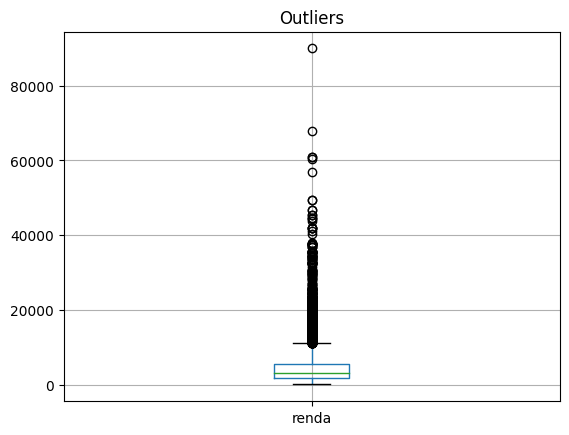

In [7]:
df1.boxplot(['renda'])
plt.title('Outliers')

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
df2=df1[['tempo_emprego','renda']]
df2['log_renda'] = np.log(df2['renda'])
df2.corr()

<ipython-input-11-28dc1296bdd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_renda'] = np.log(df2['renda'])


,tempo_emprego,renda,log_renda
tempo_emprego,1.000000,0.394235,0.379556
renda,0.394235,1.000000,0.835734
log_renda,0.379556,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acho que não era necessário, pelos valores de correlação comparando a escala original ter diferença insignificativa com a logaritímica.

Text(0.5, 1.0, 'Escala Original')

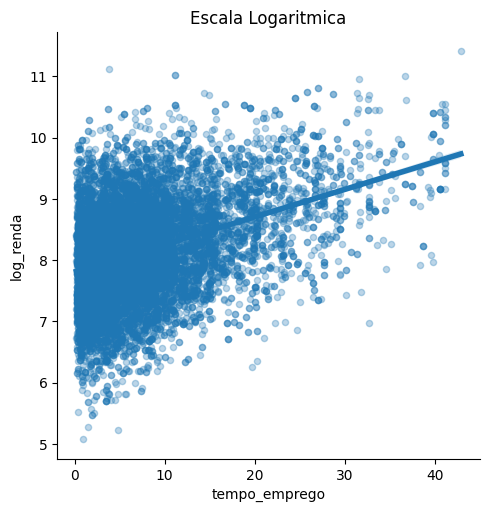

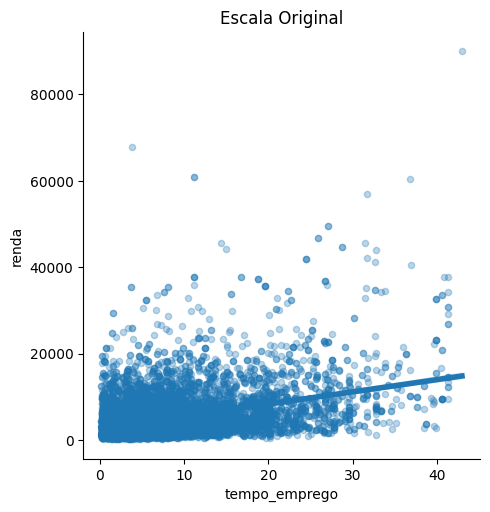

In [17]:
%matplotlib inline

sns.lmplot(x='tempo_emprego',
                  y='log_renda', 
                 data=df2, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4});
plt.title('Escala Logaritmica')

sns.lmplot(x='tempo_emprego',
                  y='renda', 
                 data=df2, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4});
plt.title('Escala Original')